In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
X_train = pd.read_csv("../data/interim/train_selected.csv")

In [8]:
X_test = pd.read_csv("../data/interim/test_selected.csv")

In [9]:
y_train = pd.read_csv("../data/interim/y_train.csv")
y_test = pd.read_csv("../data/interim/y_test.csv")

In [10]:
X_train.head()

,OverallQual,GrLivArea_capped,GarageCars,TotalBsmtSF_capped,GarageArea_capped,1stFlrSF_capped,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,BsmtQual,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageType_NoNull
0,5,1314.0,1,1314.0,294.0,1314.0,1,5,1957,1957,...,TA,No,TA,GasA,TA,Y,TA,NaN,RFn,Attchd
1,6,1571.0,2,799.0,380.0,799.0,2,7,1993,1994,...,Gd,No,Gd,GasA,Gd,Y,TA,TA,RFn,Attchd
2,5,796.0,0,796.0,0.0,796.0,1,4,1910,1950,...,Fa,No,Fa,GasA,Gd,Y,TA,NaN,NoGarage,NaN
3,5,1768.0,1,731.0,240.0,981.0,1,7,1937,1950,...,Gd,No,Gd,GasA,Ex,Y,Gd,TA,Unf,Detchd
4,5,1691.0,1,1026.0,308.0,1026.0,2,6,1924,1950,...,TA,No,TA,GasA,TA,Y,Gd,Gd,Unf,Detchd


In [11]:
X_train.shape

(1168, 46)

In [12]:
y_train

,SalePrice
0,145000
1,178000
2,85000
3,175000
4,127000
...,...
1163,176432
1164,135000
1165,115000
1166,189950


In [13]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# 1. Univariate Analysis

## Categorical data

In [14]:
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandSlope', 'Neighborhood',
       'HouseStyle', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual',
       'FireplaceQu', 'GarageFinish', 'GarageType_NoNull'],
      dtype='object')

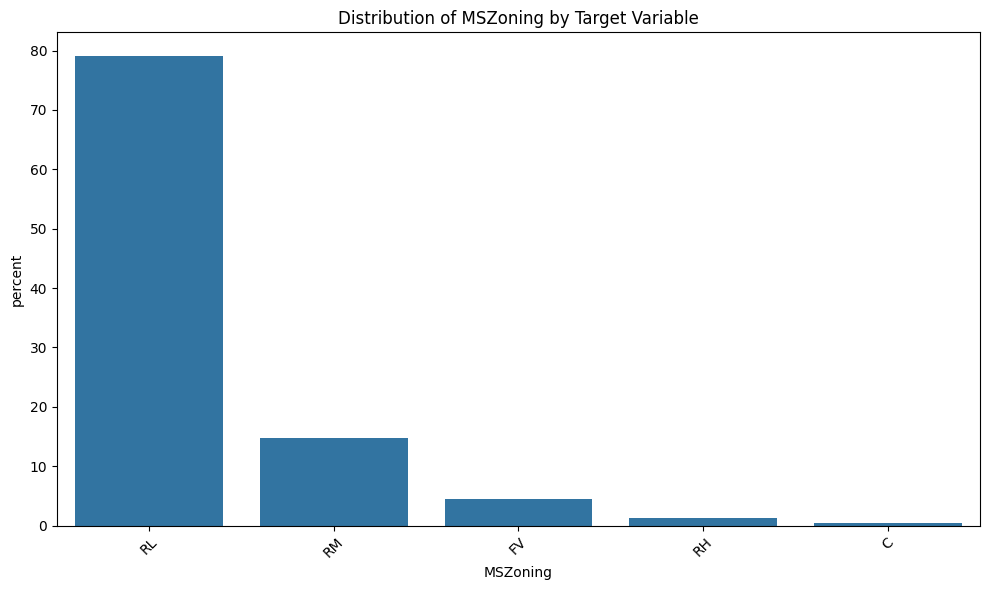

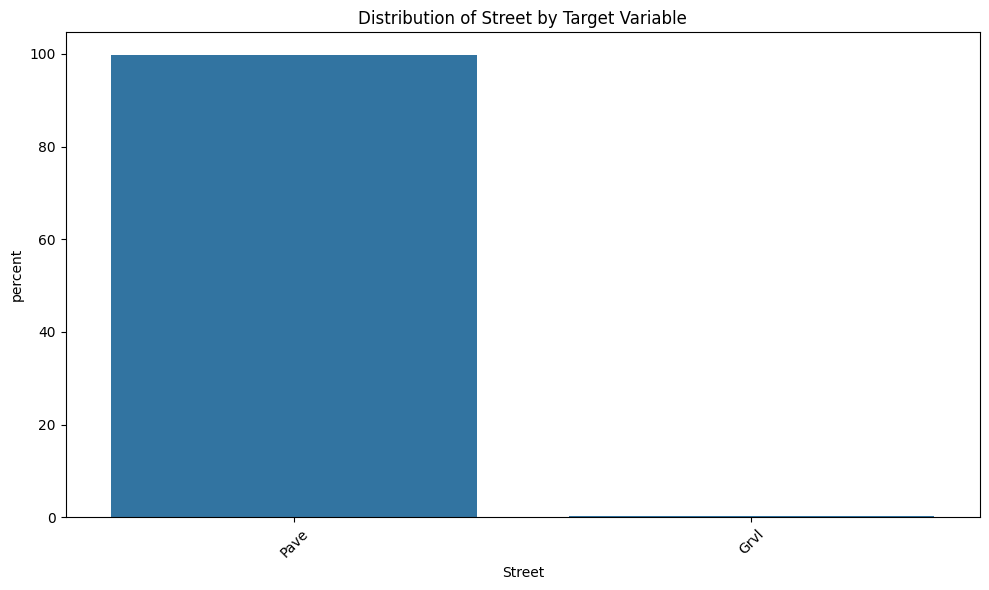

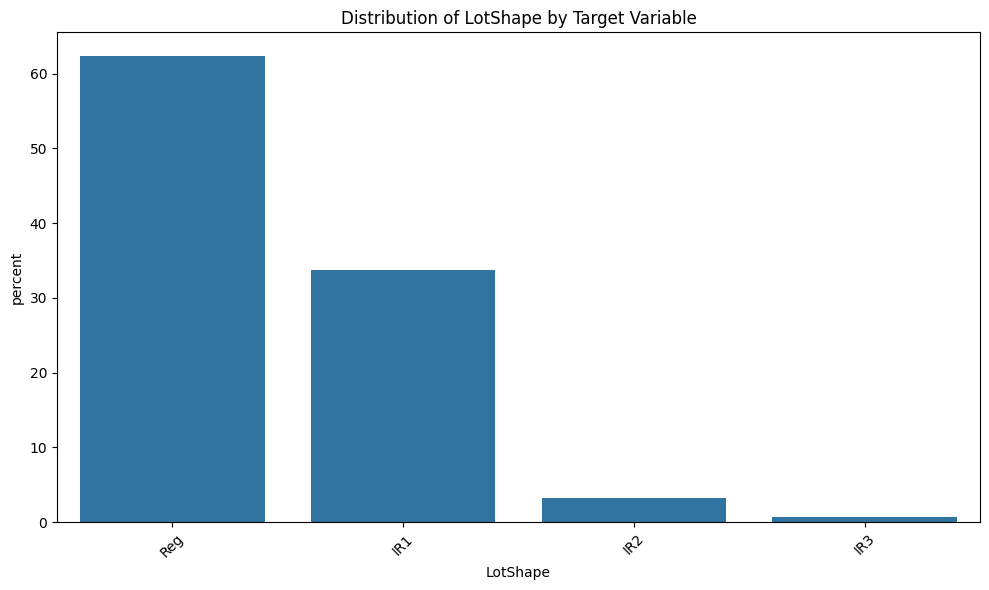

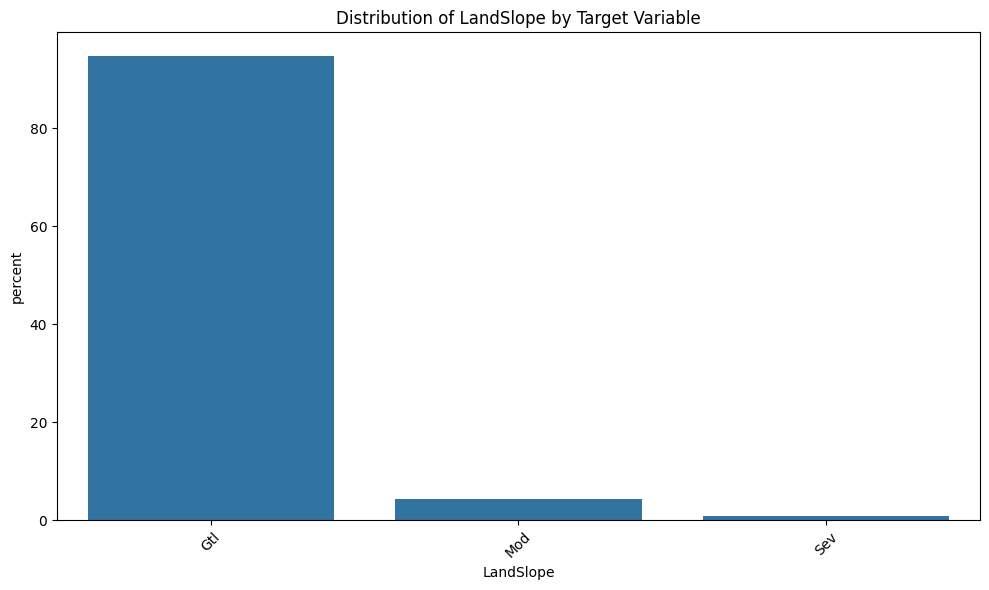

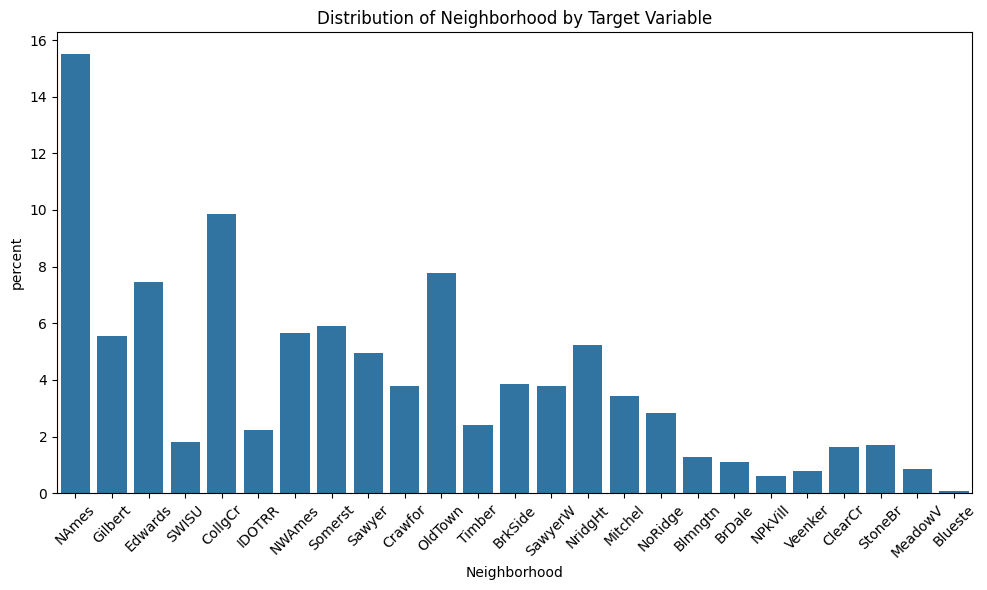

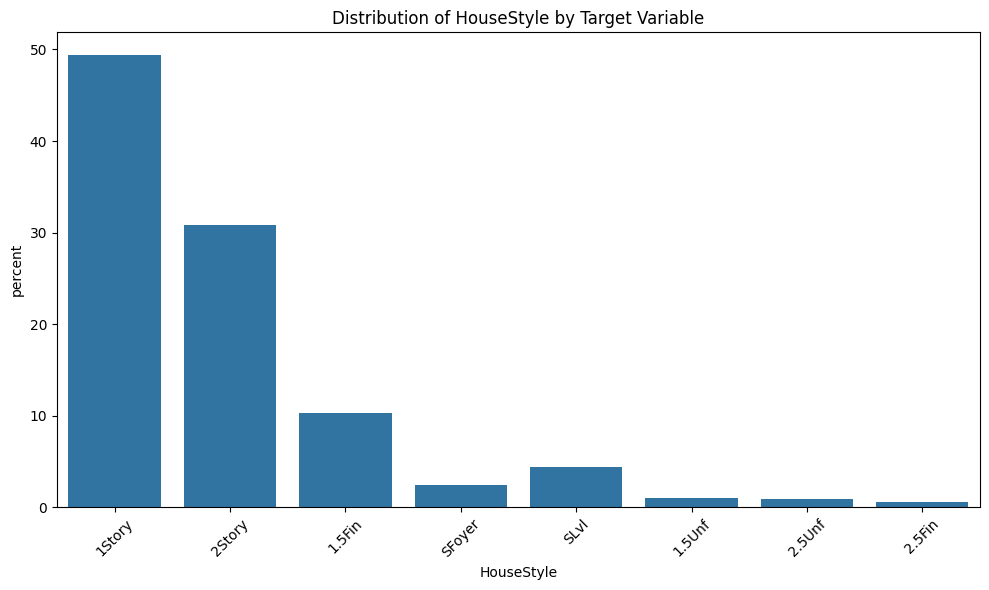

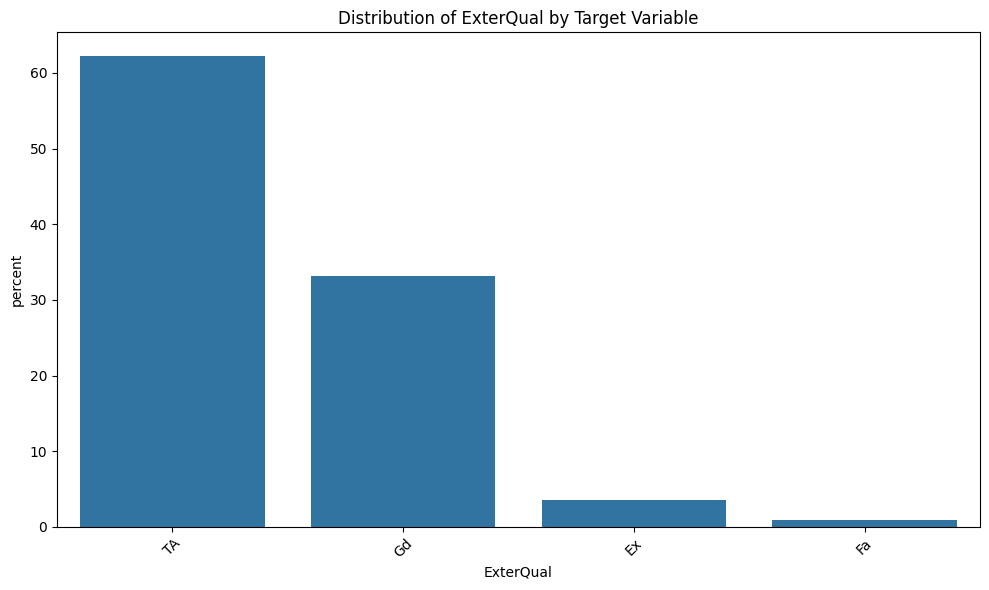

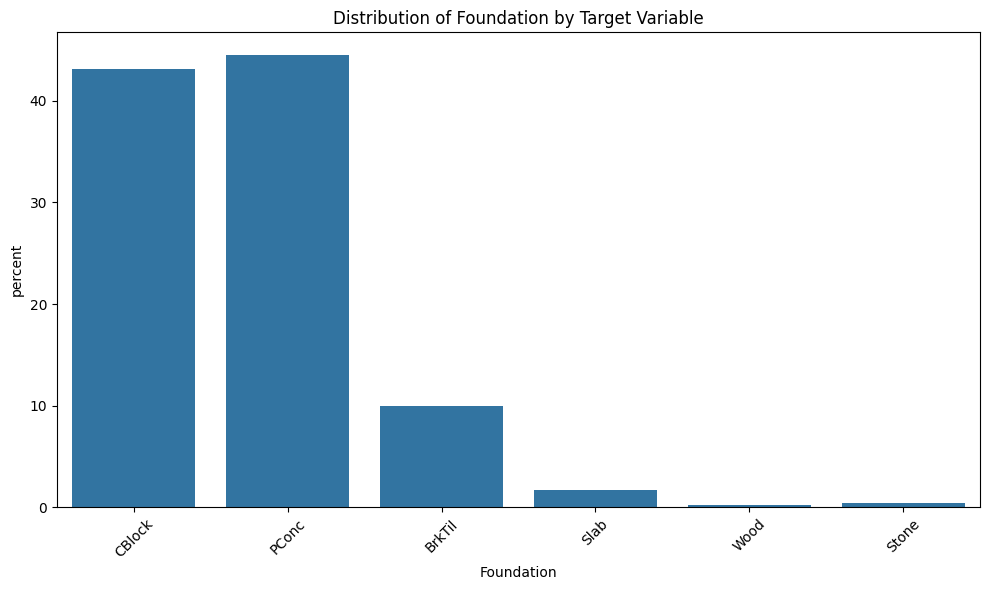

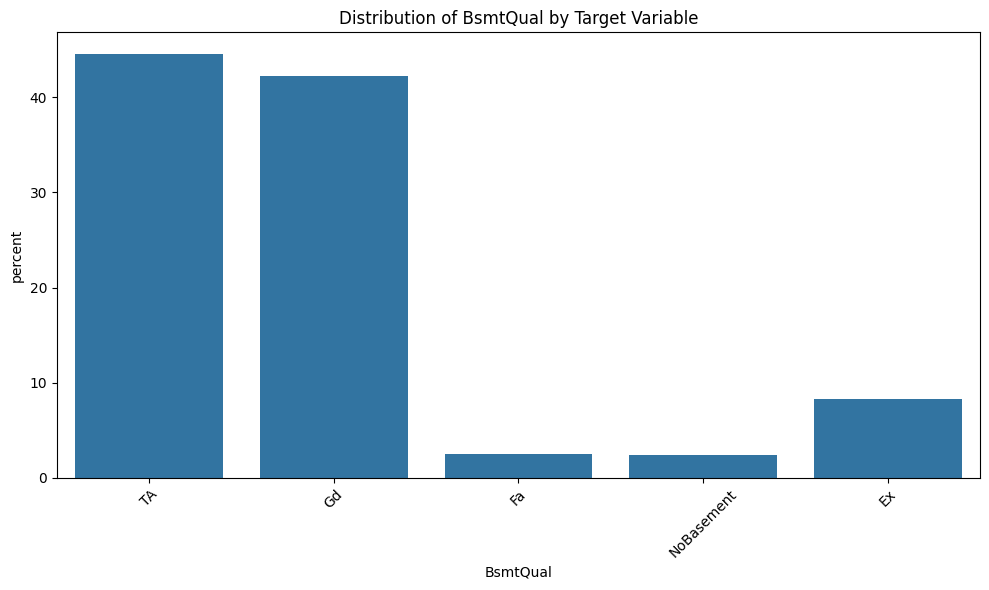

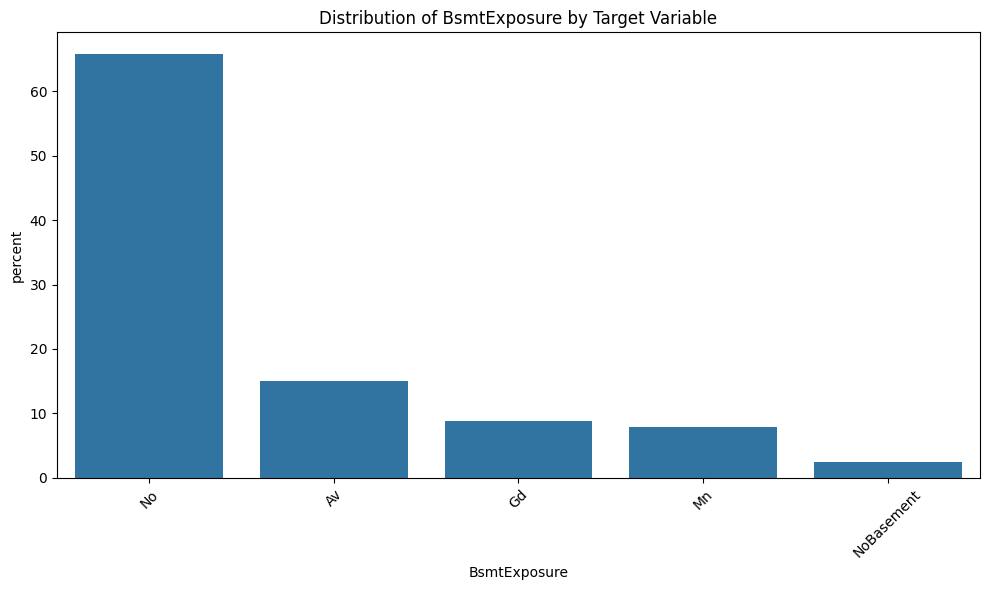

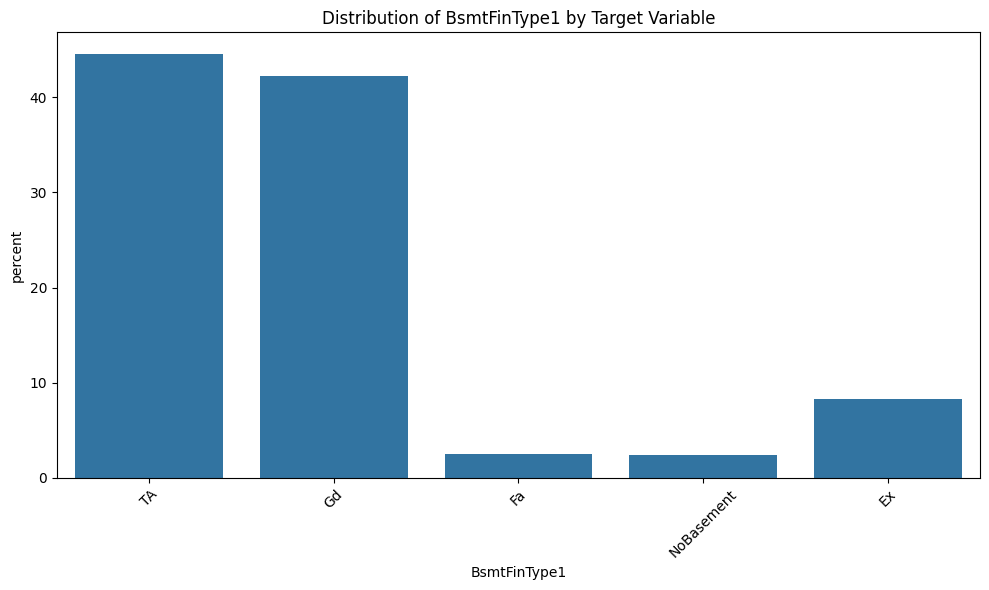

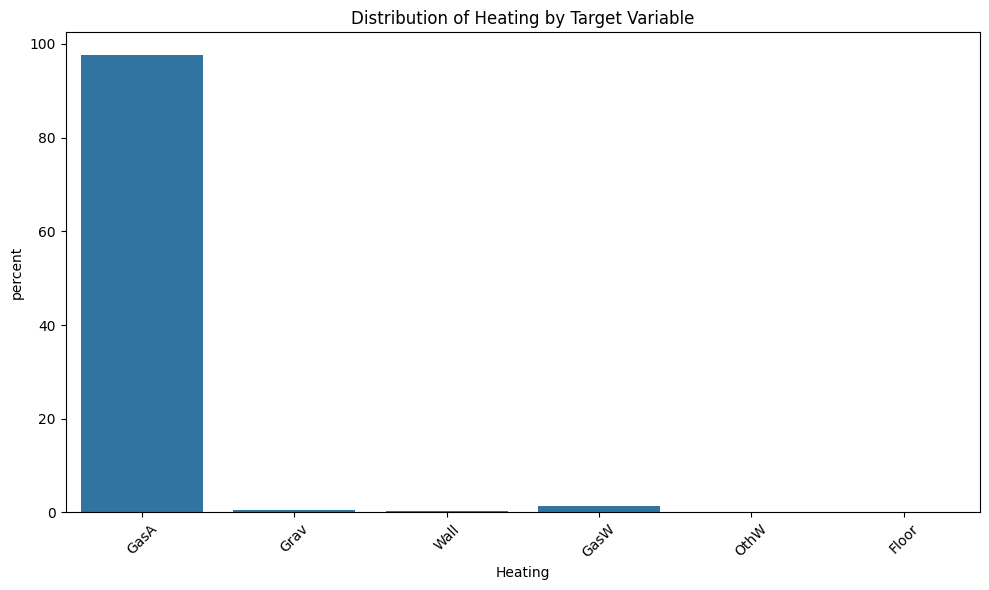

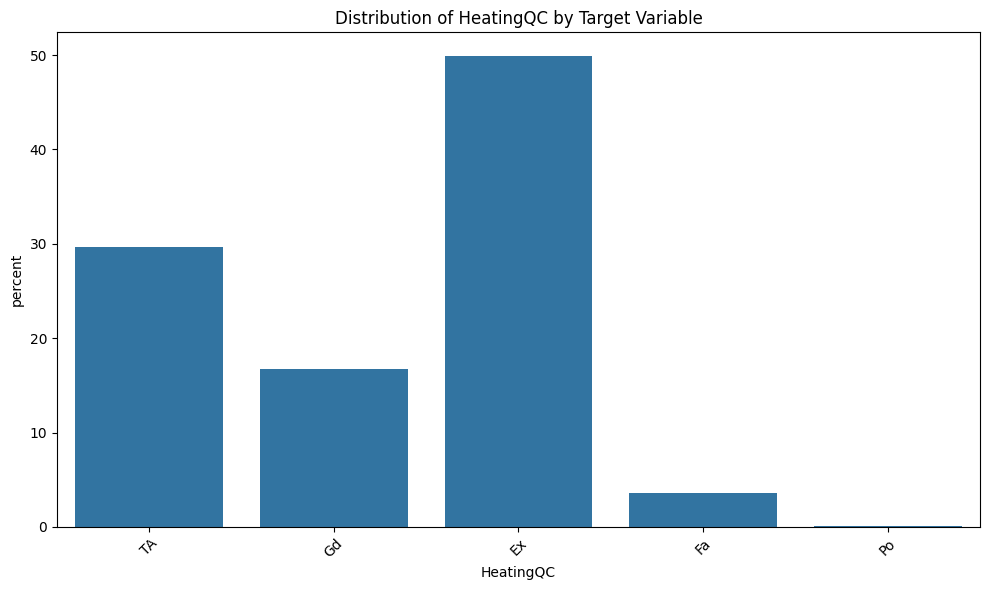

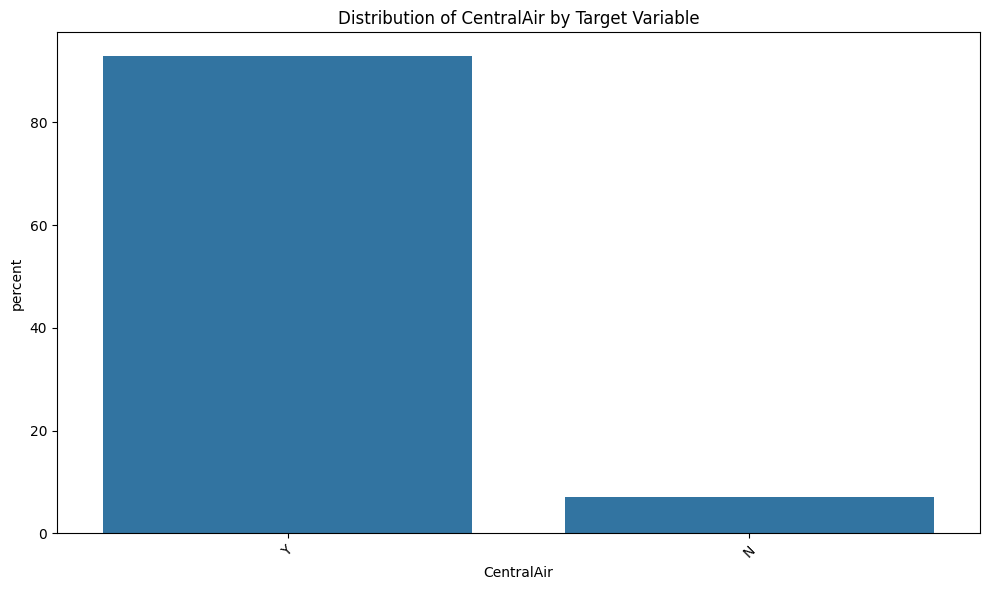

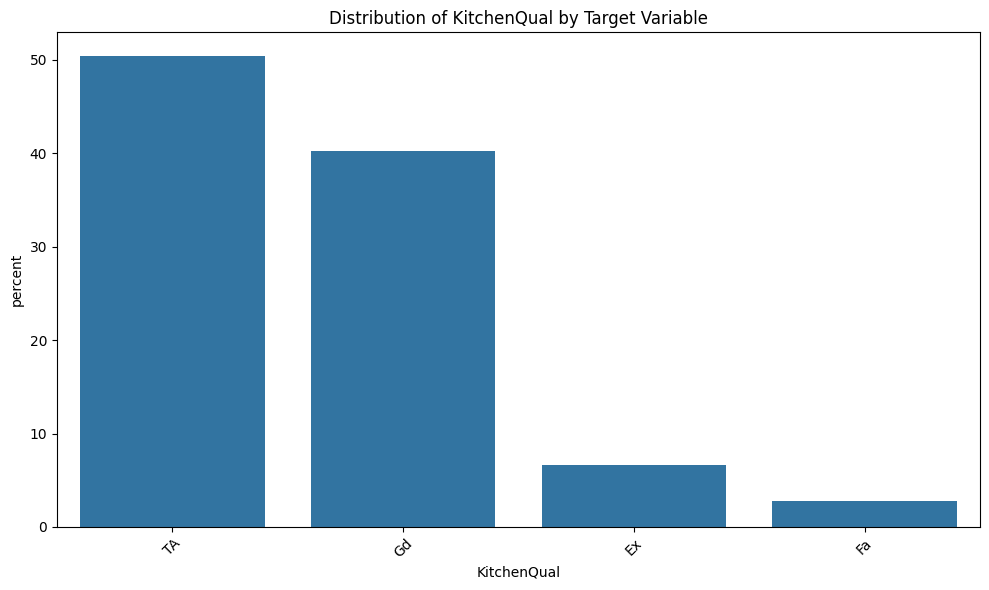

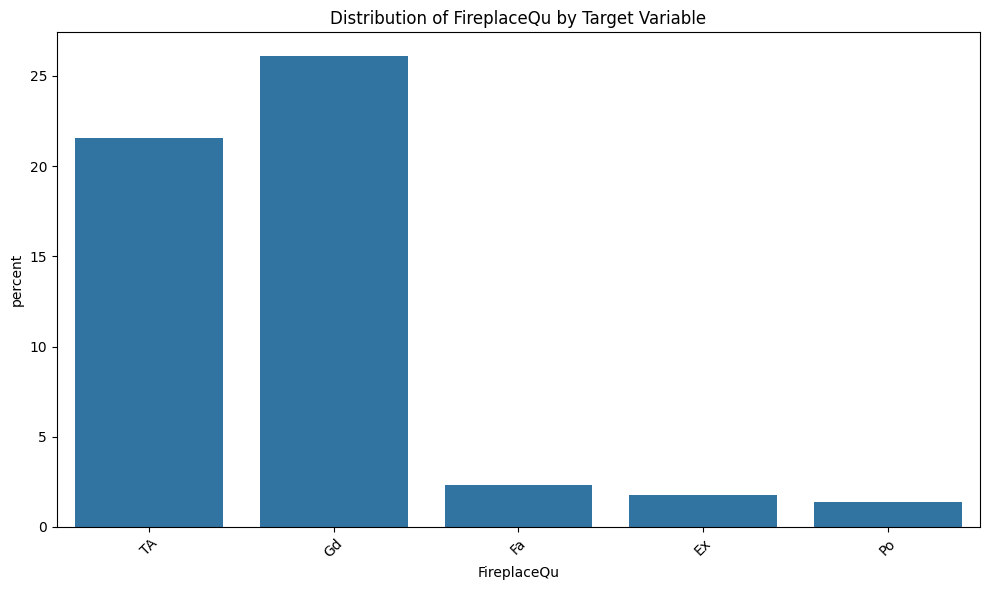

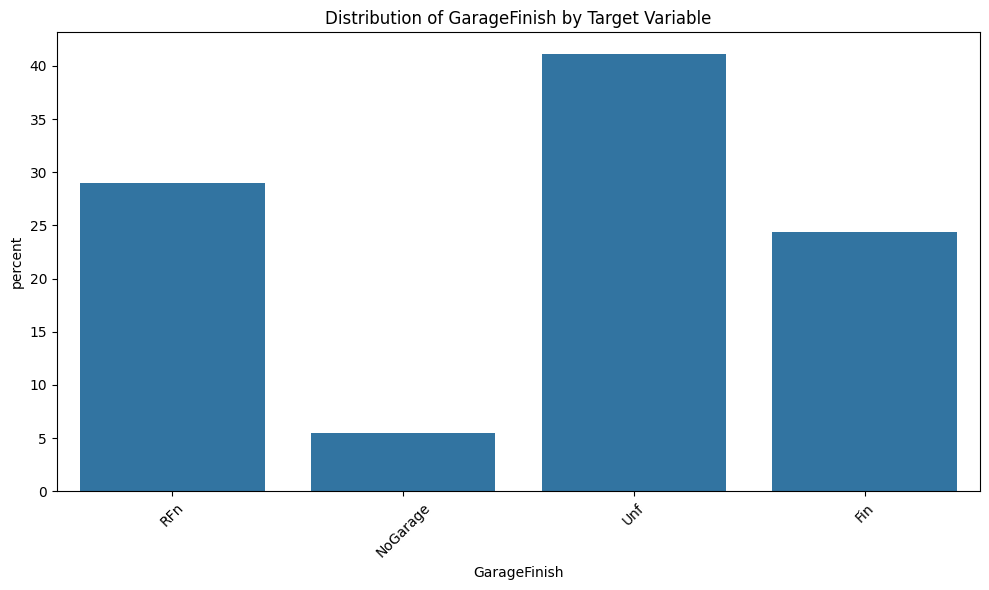

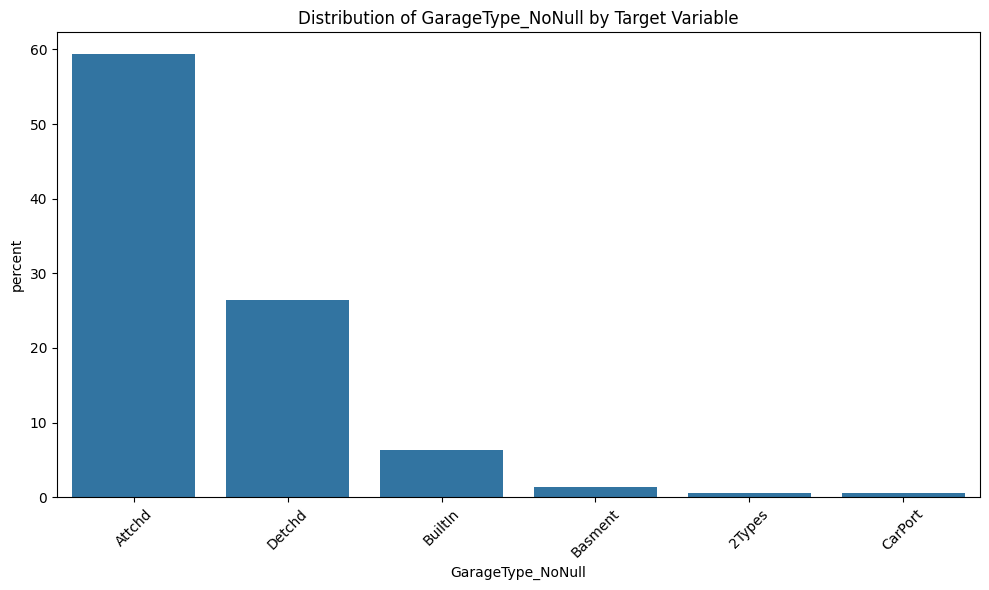

In [15]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=X_train, x=feature, stat = "percent")
    plt.title(f'Distribution of {feature} by Target Variable')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [16]:
X_train.shape, X_test.shape

((1168, 46), (292, 46))

In [17]:
# Dropping less important features based on EDA
X_test.drop(columns= ["Street","BsmtFinType1", "BsmtExposure", "Heating", "CentralAir"], inplace=True)
X_train.drop(columns= ["Street","BsmtFinType1", "BsmtExposure", "Heating", "CentralAir"], inplace=True)

X_train.shape, X_test.shape

((1168, 41), (292, 41))

## Numerical Data

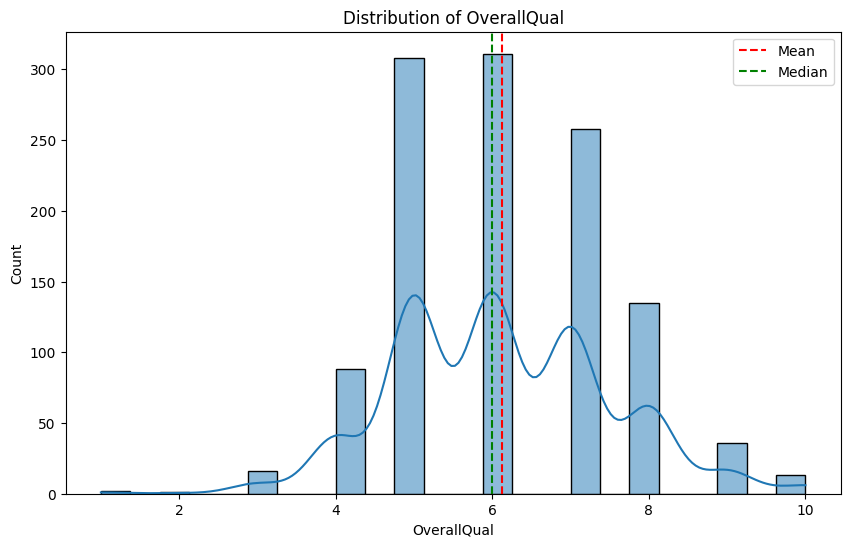

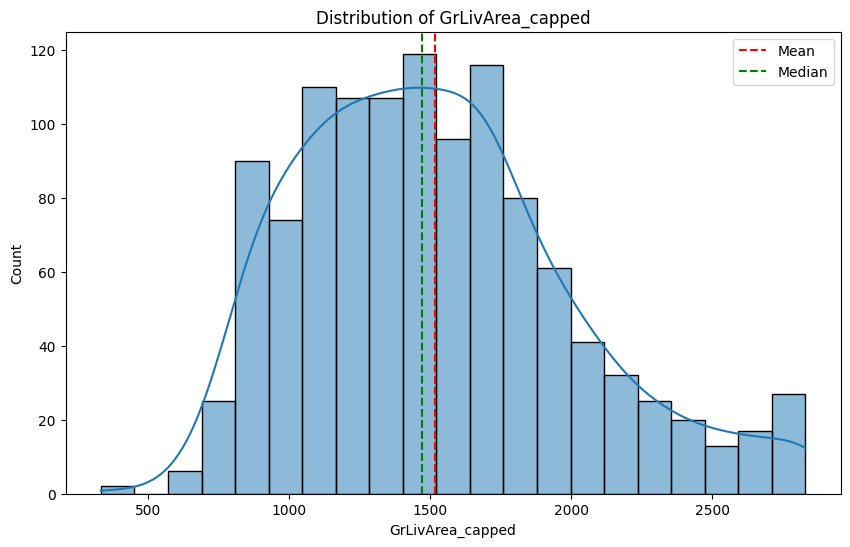

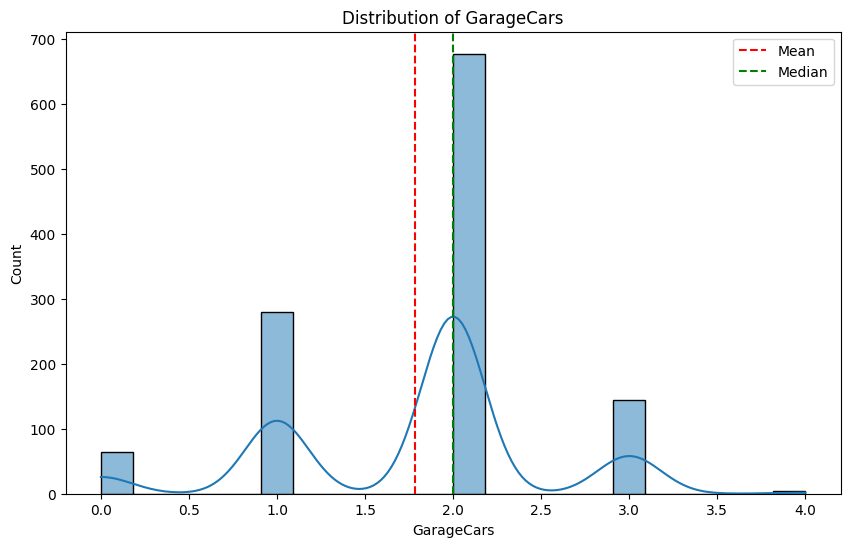

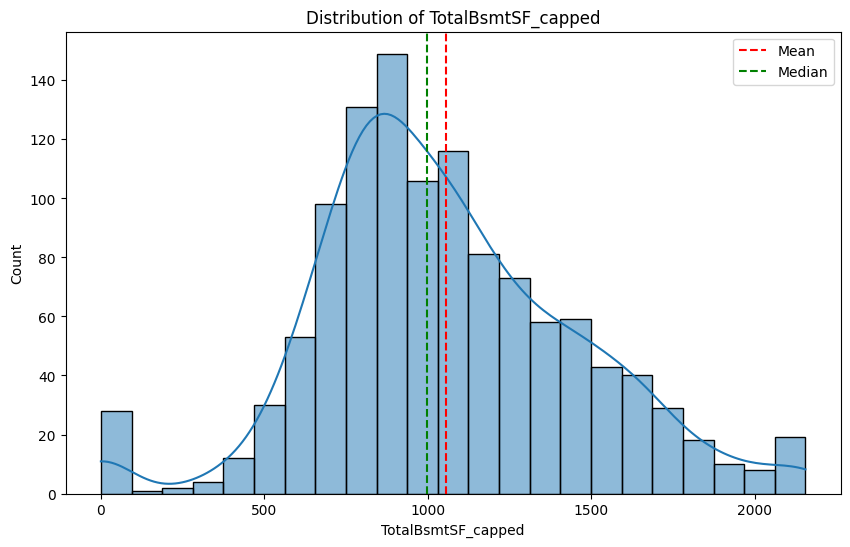

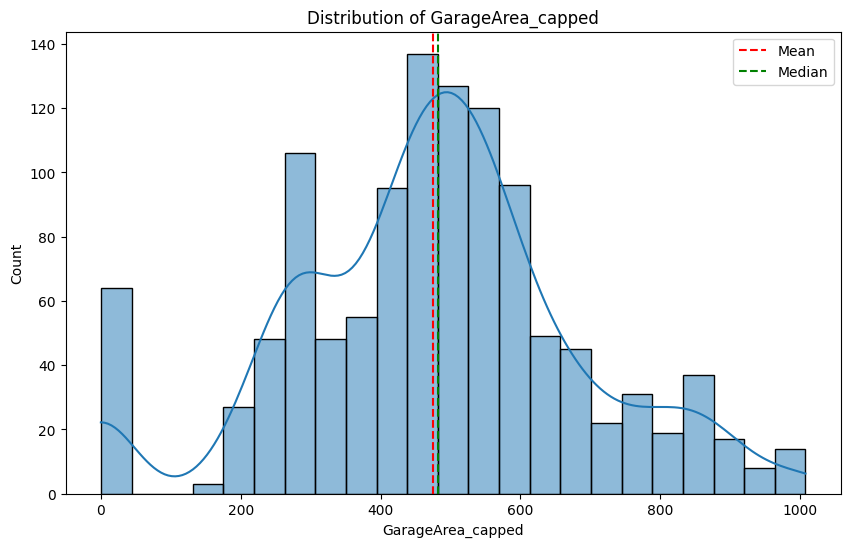

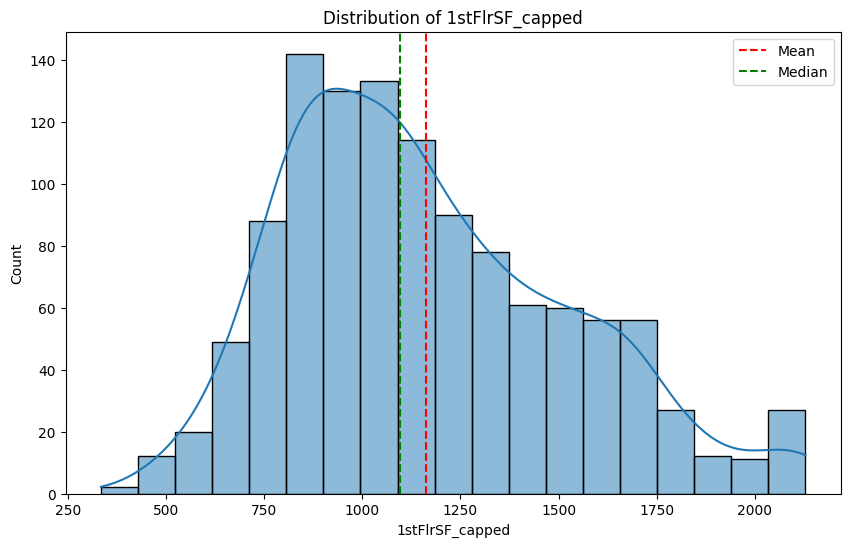

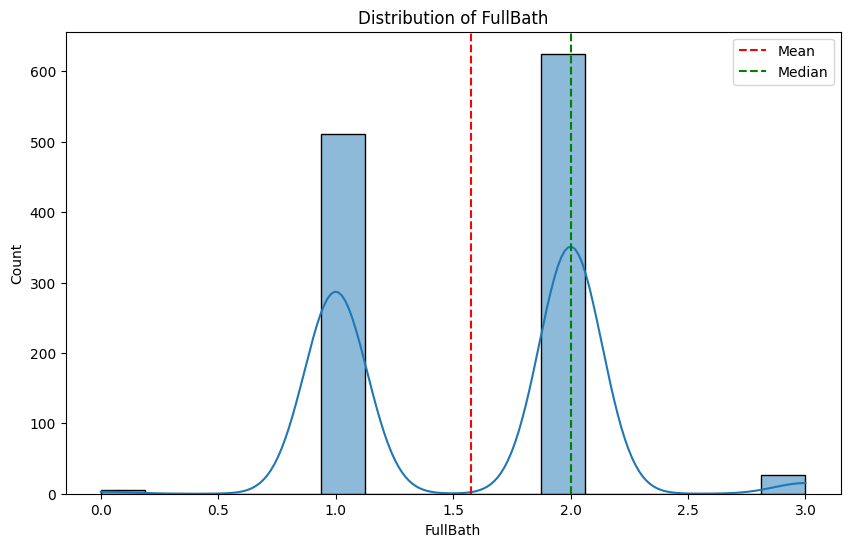

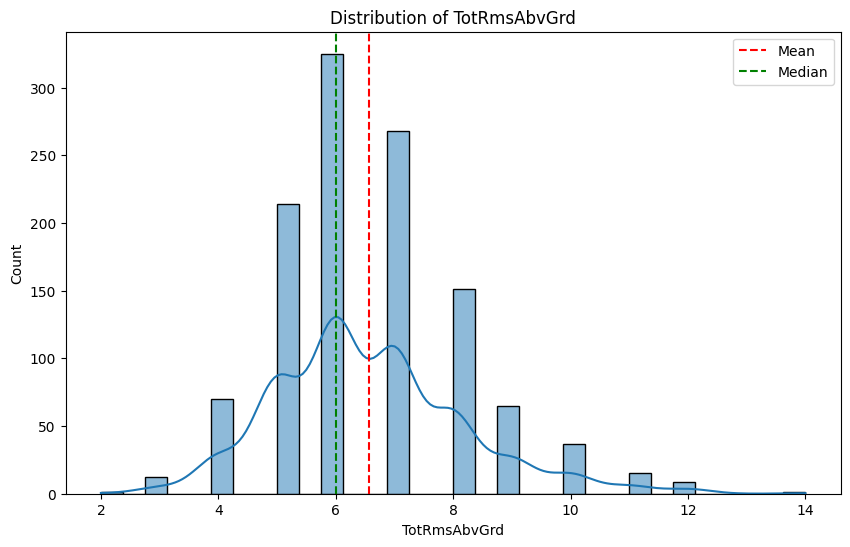

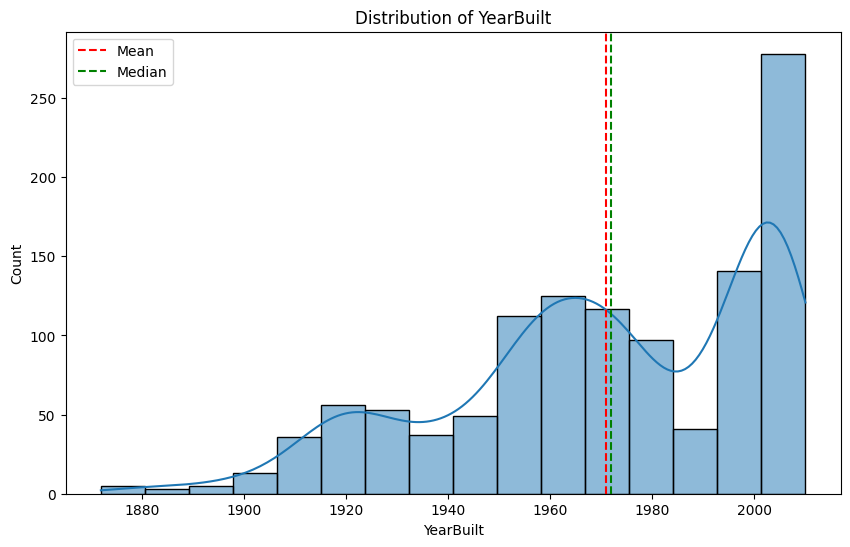

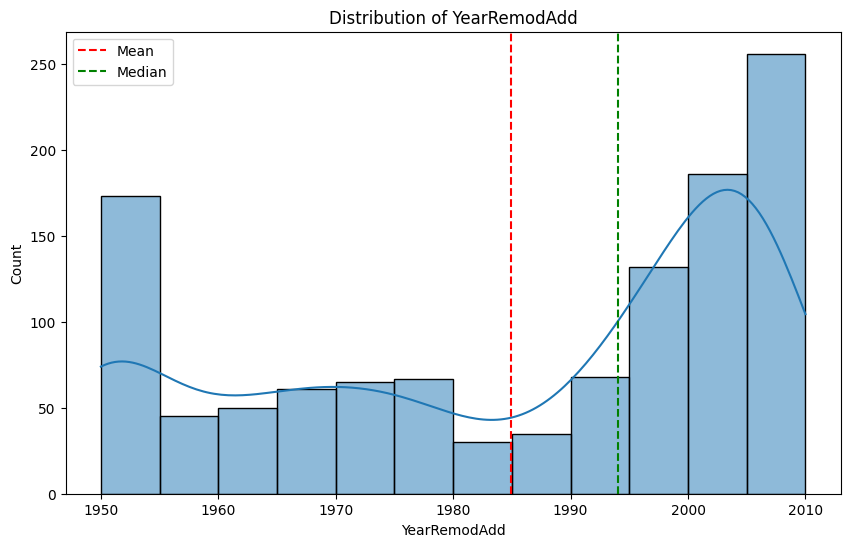

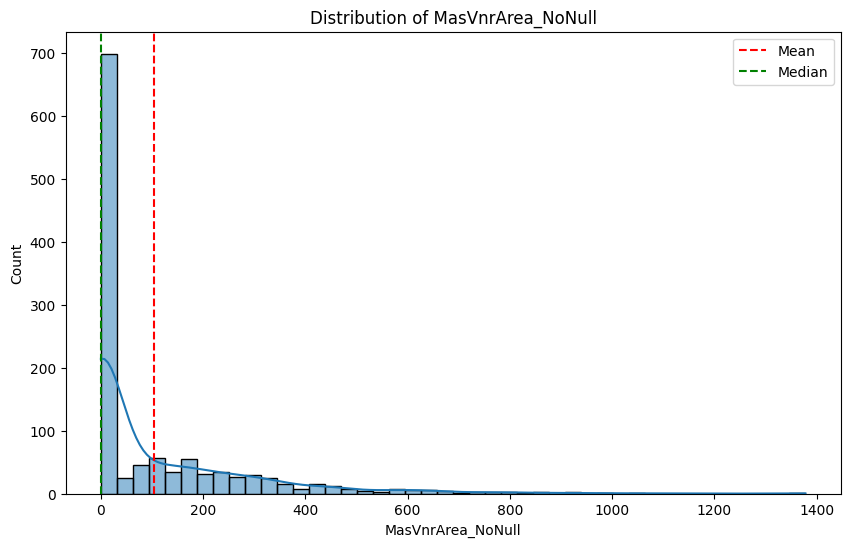

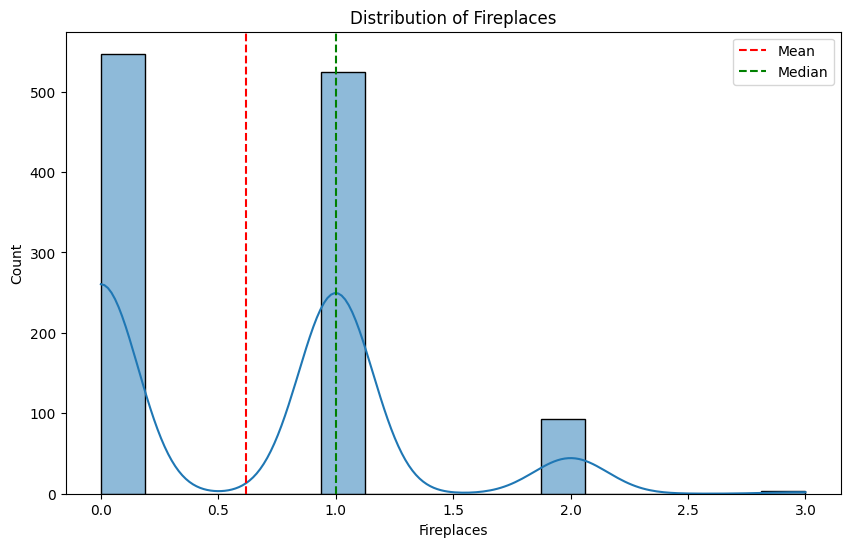

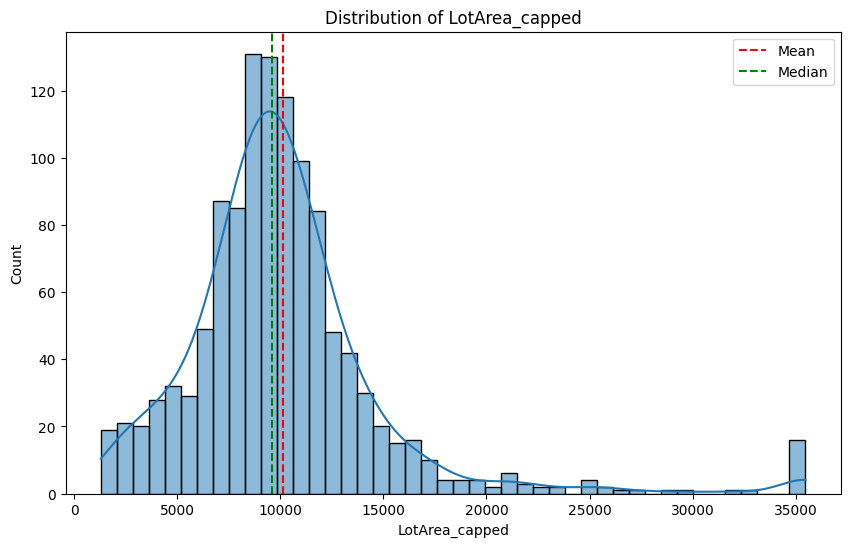

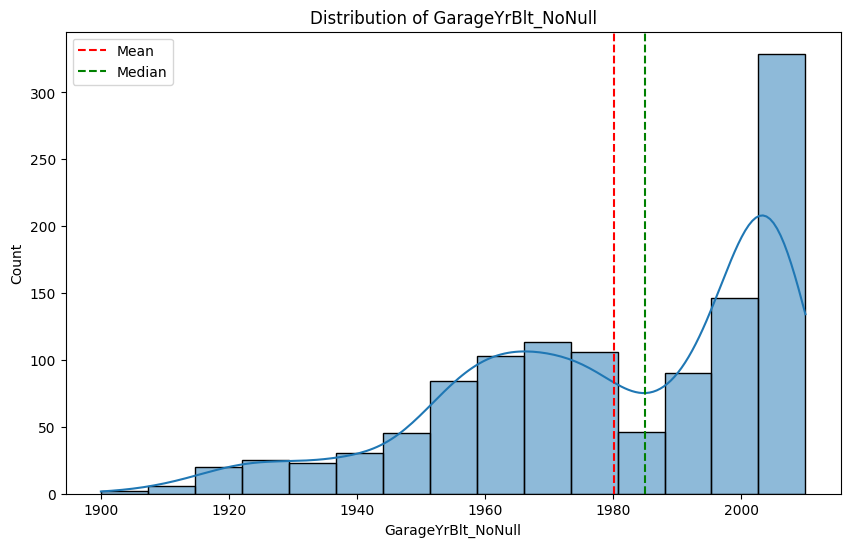

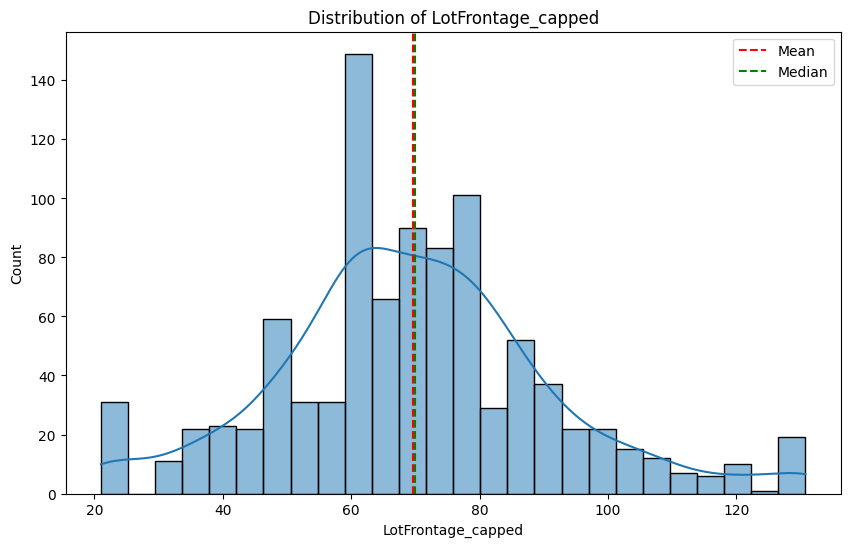

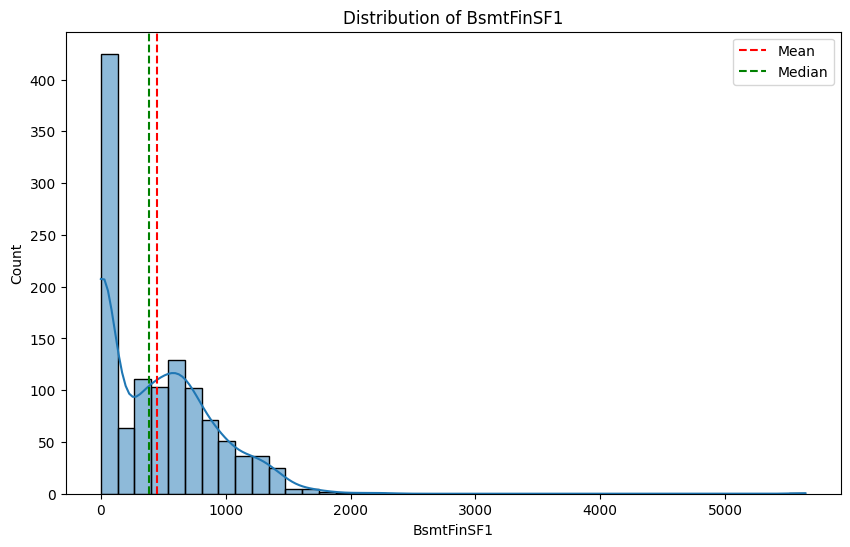

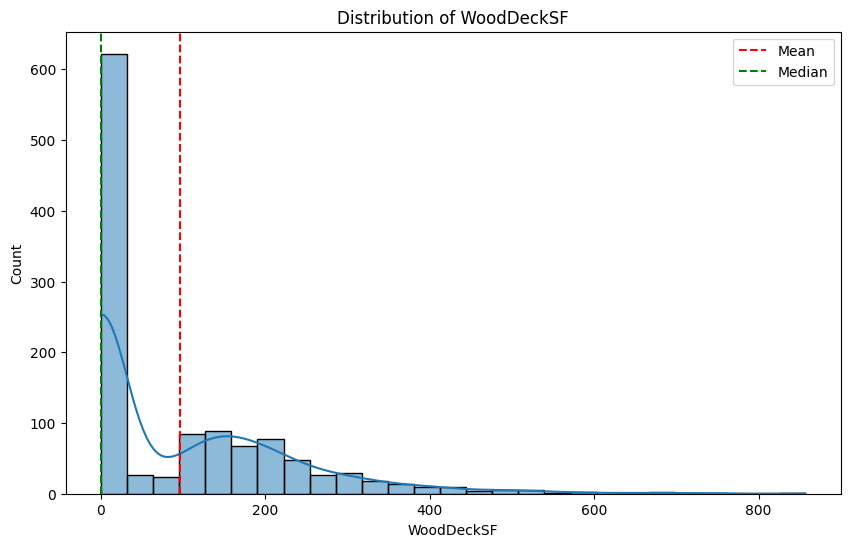

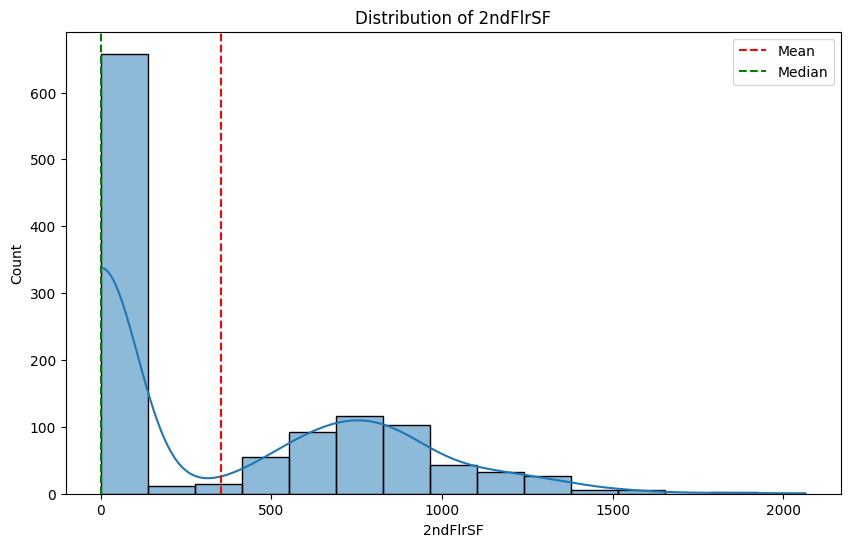

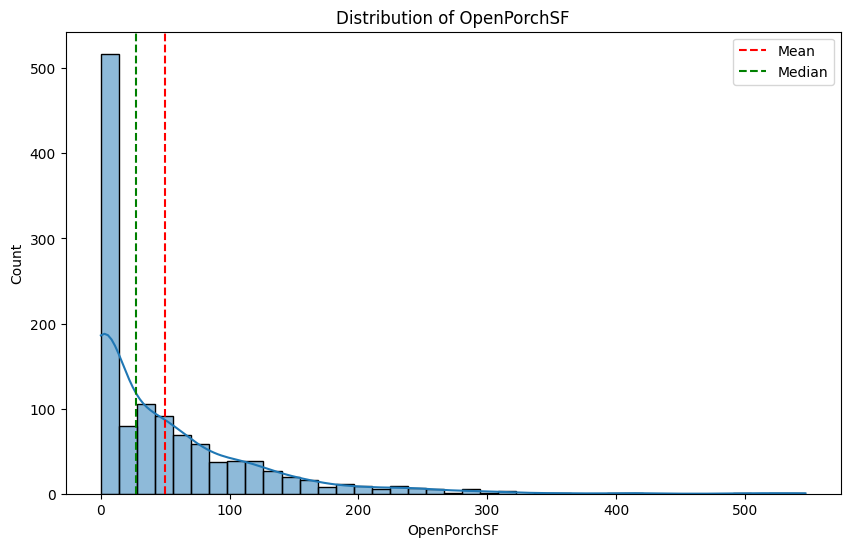

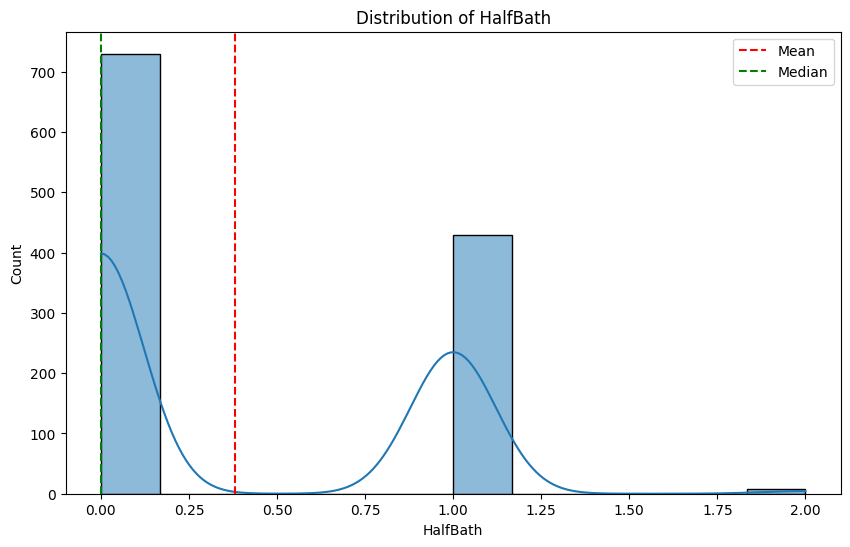

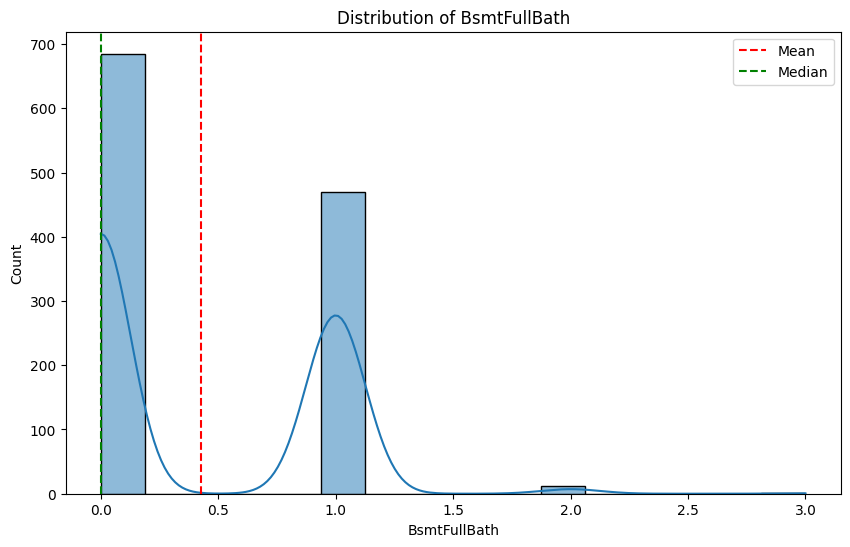

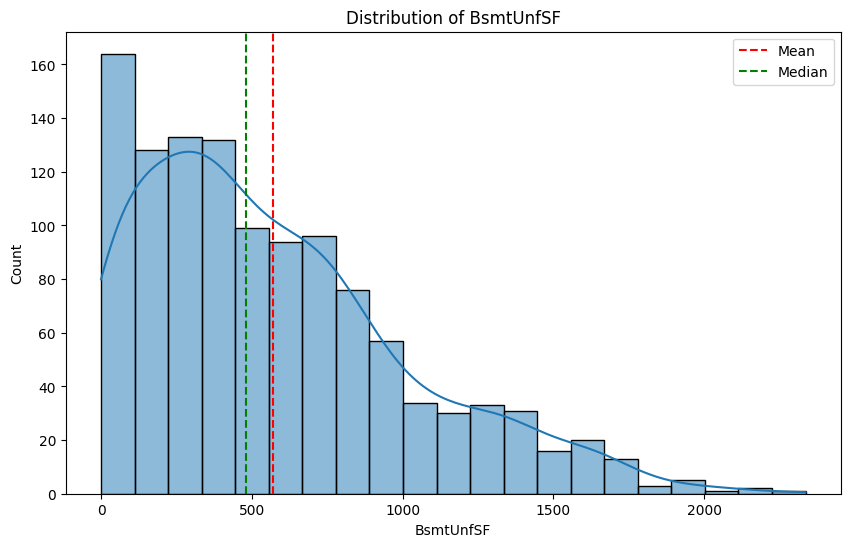

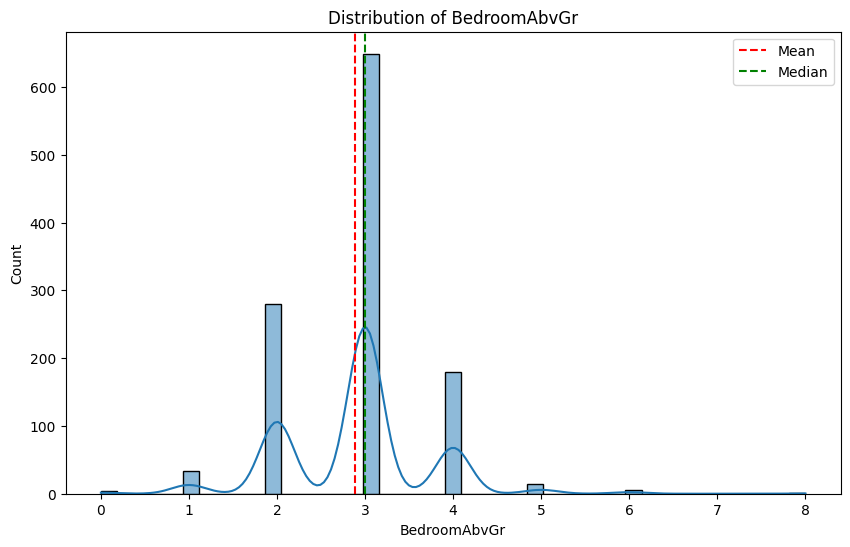

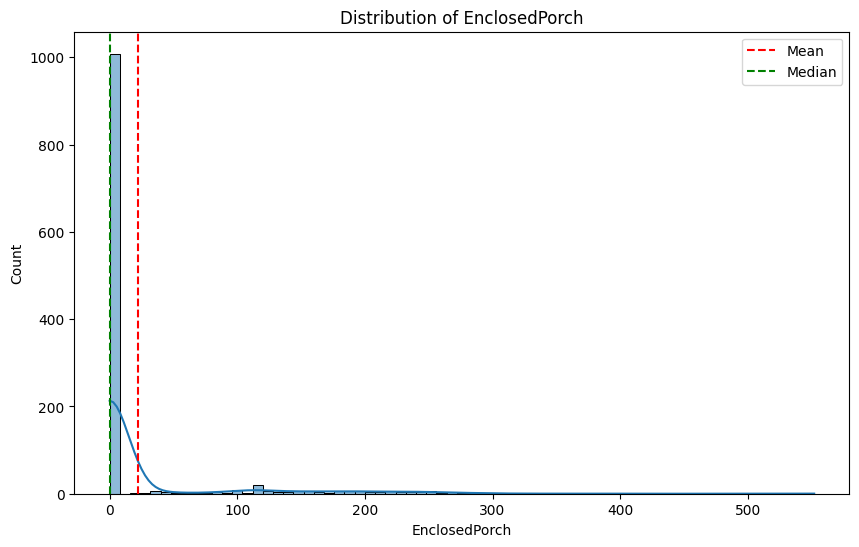

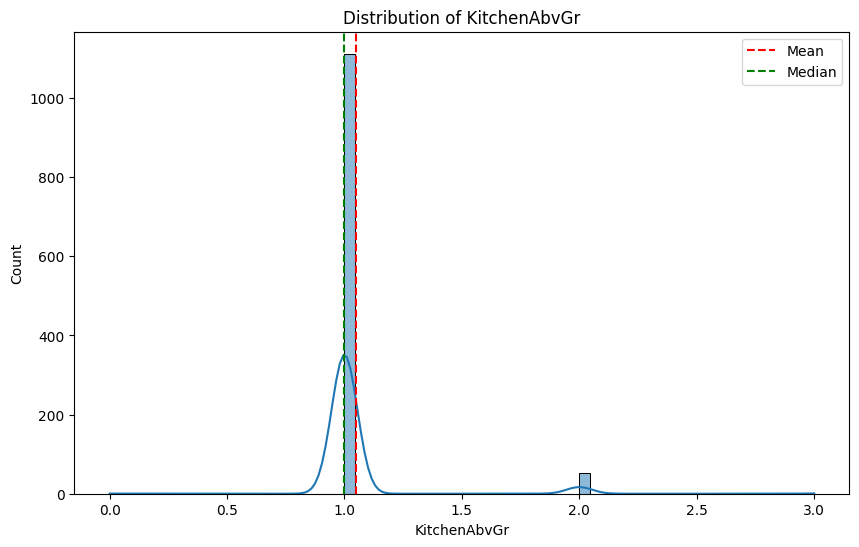

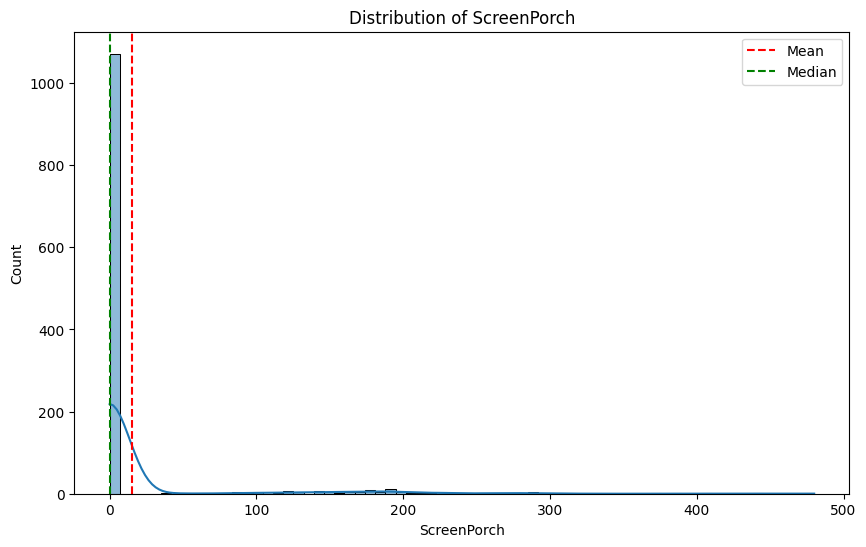

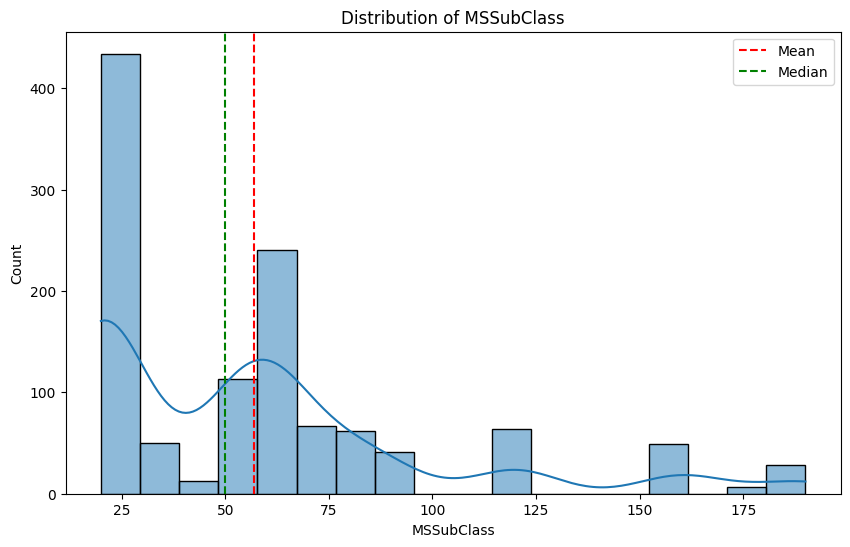

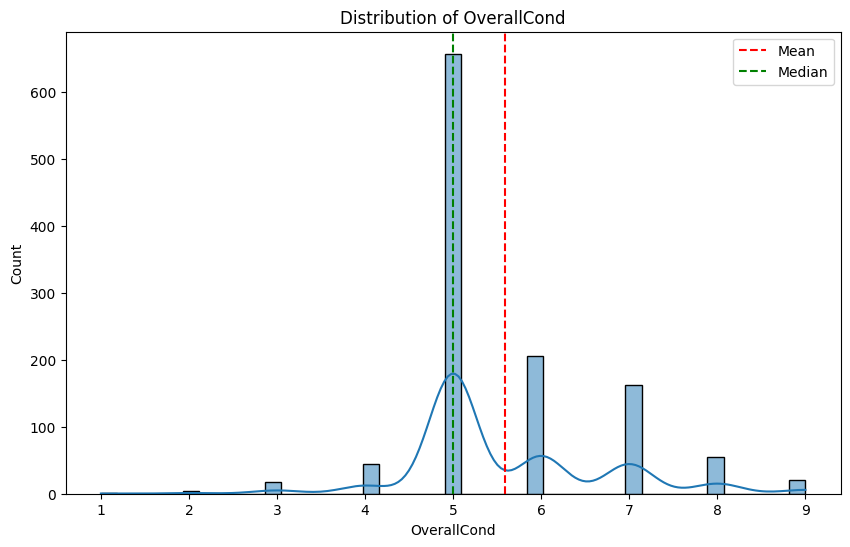

In [18]:
# histogram for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=X_train, x = feature, kde = True)
    plt.axvline(X_train[feature].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(X_train[feature].median(), color='g', linestyle='--', label='Median')
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.show()

In [19]:
numerical_features.shape

(28,)

In [20]:
X_train["GarageCars"].value_counts()

GarageCars
2    677
1    279
3    144
0     64
4      4
Name: count, dtype: int64

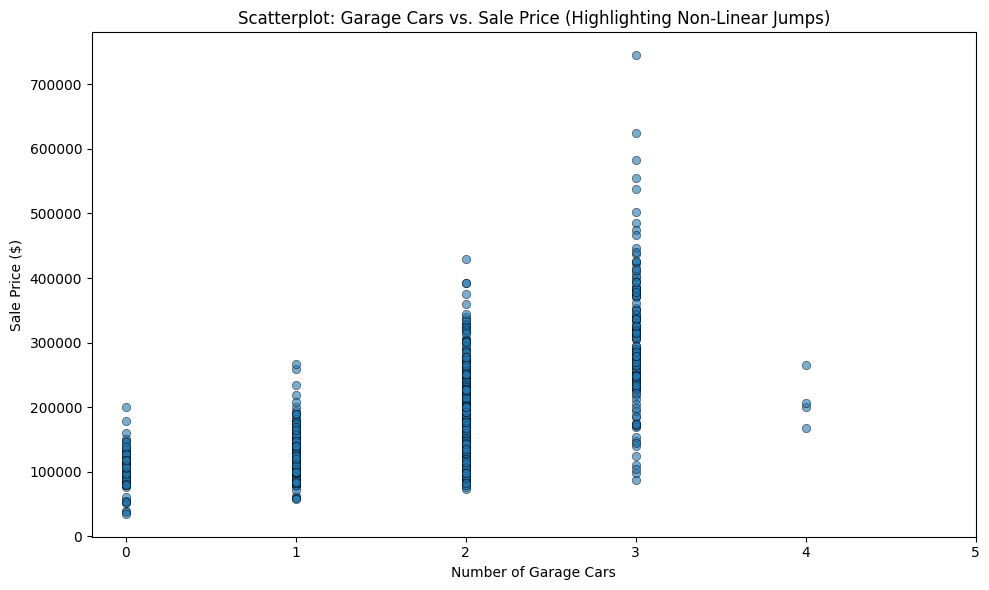

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['GarageCars'], y_train, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.title('Scatterplot: Garage Cars vs. Sale Price (Highlighting Non-Linear Jumps)')
plt.xlabel('Number of Garage Cars')
plt.ylabel('Sale Price ($)')
plt.xticks([0, 1, 2, 3, 4, 5])  # Customize to your data's range
plt.tight_layout()
plt.show()

In [24]:
X_train["FullBath"].value_counts()

FullBath
2    625
1    511
3     27
0      5
Name: count, dtype: int64

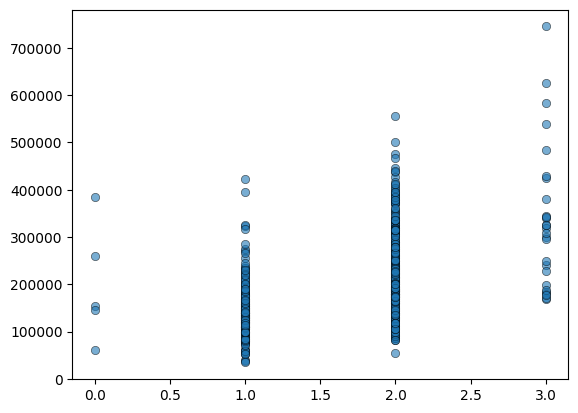

In [25]:
plt.scatter(X_train['FullBath'], y_train, alpha=0.6, edgecolors='k', linewidth=0.5)
